In [1]:
#requirements
#pip3 install pandas numpy prophet

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/datasets/onemonthprocessed.csv')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                    ds     y
0  13/05/2024 00:00:00  6.61
1  13/05/2024 00:00:05  6.66
2  13/05/2024 00:00:10  6.66
3  13/05/2024 00:00:15  6.41
4  13/05/2024 00:00:20  6.41
                         ds     y
550069  13/06/2024 23:59:40  2.81
550070  13/06/2024 23:59:45  2.91
550071  13/06/2024 23:59:50  2.91
550072  13/06/2024 23:59:55  2.84
550073  14/06/2024 00:00:00  2.84
                   y
count  550074.000000
mean        4.362149
std         2.275328
min         0.450000
25%         2.240000
50%         4.560000
75%         5.940000
max        11.520000
ds     object
y     float64
dtype: object
550074


In [4]:
from prophet import Prophet
df['cap']=100
m = Prophet(growth='logistic')
m.fit(df) 

#future = m.make_future_dataframe(periods=1, freq='H')

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
19:54:09 - cmdstanpy - INFO - Chain [1] start processing
20:01:46 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=30, freq='D')

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


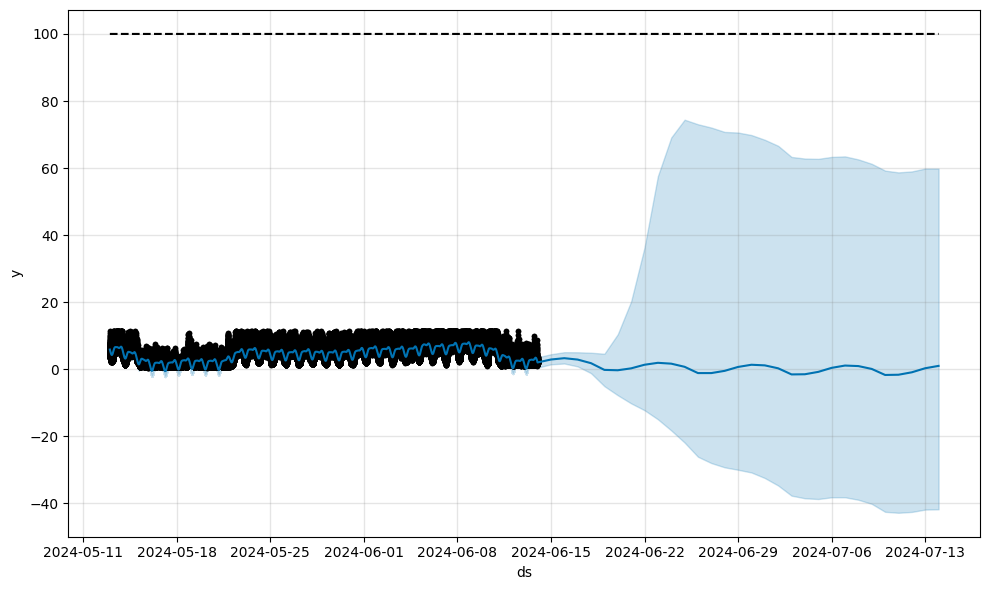

In [6]:
future['cap'] = 100

fcst = m.predict(future)
fig = m.plot(fcst)

In [8]:
predicted_results = fcst[['ds', 'yhat', 'yhat_lower','yhat_upper', 'trend','trend_lower', 'trend_upper']]
print(predicted_results.head())

                   ds      yhat  yhat_lower  yhat_upper     trend  \
0 2024-05-13 00:00:00  5.867793    4.306059    7.375951  5.072760   
1 2024-05-13 00:00:05  5.866887    4.391093    7.447604  5.072757   
2 2024-05-13 00:00:10  5.865980    4.422492    7.473651  5.072754   
3 2024-05-13 00:00:15  5.865073    4.300796    7.329873  5.072751   
4 2024-05-13 00:00:20  5.864166    4.325963    7.472014  5.072749   

   trend_lower  trend_upper  
0     5.072760     5.072760  
1     5.072757     5.072757  
2     5.072754     5.072754  
3     5.072751     5.072751  
4     5.072749     5.072749  


In [9]:
predicted_results.to_csv('../data/predicted/fbproph_month_predicted.csv', index=False)

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

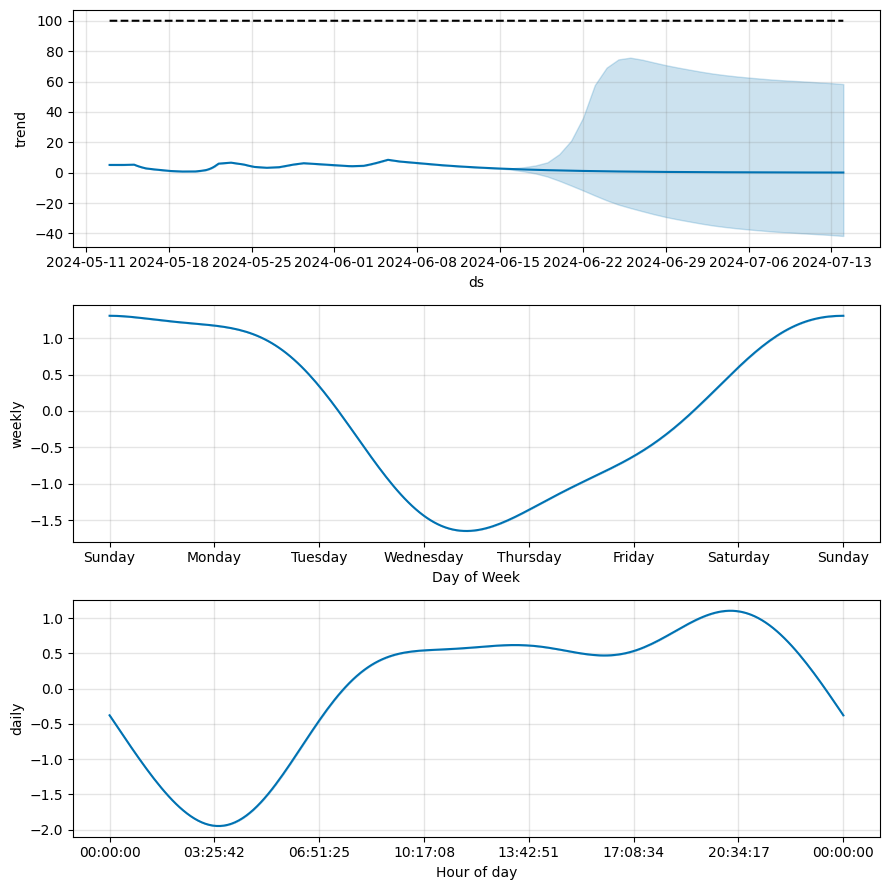

In [11]:
fig1 = m.plot_components(fcst)

In [12]:
print(predicted_results.describe())

                                  ds           yhat     yhat_lower  \
count                         550073  550073.000000  550073.000000   
mean   2024-05-28 23:14:20.913215488       4.366069       2.834625   
min              2024-05-13 00:00:00      -1.707558     -42.810434   
25%              2024-05-20 23:23:15       2.766689       1.238982   
50%              2024-05-28 22:35:35       4.834537       3.301582   
75%              2024-06-05 22:42:55       5.868187       4.333648   
max              2024-07-14 00:00:00       8.070457       6.763419   
std                              NaN       1.925403       1.941283   

          yhat_upper          trend    trend_lower    trend_upper  
count  550073.000000  550073.000000  550073.000000  550073.000000  
mean        5.898903       4.441164       4.439773       4.443895  
min         0.749521       0.068912     -41.698679       0.715015  
25%         4.298666       3.398731       3.398731       3.398936  
50%         6.362880       4.

In [13]:
print(predicted_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550073 entries, 0 to 550072
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ds           550073 non-null  datetime64[ns]
 1   yhat         550073 non-null  float64       
 2   yhat_lower   550073 non-null  float64       
 3   yhat_upper   550073 non-null  float64       
 4   trend        550073 non-null  float64       
 5   trend_lower  550073 non-null  float64       
 6   trend_upper  550073 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 29.4 MB
None
